# 프로젝트로 배우는 데이터사이언스
## 2. EDA를 통해 데이터 탐색하기


## 2.1.1 당뇨병 데이터셋
### 데이터 구성

Pregnancies : 임신 횟수
<br>Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
<br>BloodPressure : 이완기 혈압 (mm Hg)
<br>SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
<br>Insulin : 2시간 혈청 인슐린 (mu U / ml)
<br>BMI : 체질량 지수 (체중kg / 키(m)^2)
<br>DiabetesPedigreeFunction : 당뇨병 혈통 기능
<br>Age : 나이
<br>Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.
<br><br>**EDA: Exploratory Data Analysis (탐색적 데이터 분석)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# read_까지 작성 후 tab키 누르면 다양한 형식의 파일 불러오기 확인
df=pd.read_csv('data/diabetes.csv')
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df_null=df.isnull()
df_null.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [7]:
# 결측치 수 세기 -> 전혀 없음
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# describe() : 수치 데이터에 대한 요약값 확인
# include="object" 옵션은 object타입 있을 때 포함 출력
# 1사분위는 25%, 2사분위는 50%, 3사분위수는 75%
# 평균값이 중위값보다 높다는 것은 max 값이 꽤 높다는 의미
# min을 보면 최소값이 모두 0인데 글루코스, 혈압, skinthickness(피부주름두께), BMI은 0일 수 없으므로 결측치일 가능성이 높음
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# 처음 시작열부터 마지막에서 2번째 열까지 list형태로 만듦
feature_columns=df.columns[0:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## 2.1.2 결측치 보기

In [13]:
# feature_columns 중 첫번째 열 뺀 나머지 열 ->cols 변수
cols=feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [15]:
# 0으로 기록된 값을 null로 처리
# 글루코스, 혈압, BMI 등도 결측치가 있는데 인슐린이 특히 결측치가 많음
# 인슐린 수치가 당뇨병 예측에 크게 도움이 되지 않았는데 결측치가 너무 많아서 그렇다는 예상 가능
df_null=df[cols].replace(0,np.nan)
df_null=df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

<AxesSubplot:>

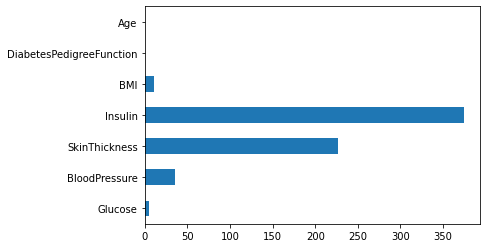

In [16]:
# 결측치 수치 시각화
df_null.sum().plot.barh()

In [18]:
# 인슐린의 경우 전체 대비 48%가 결측치
df_null.mean()*100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<AxesSubplot:>

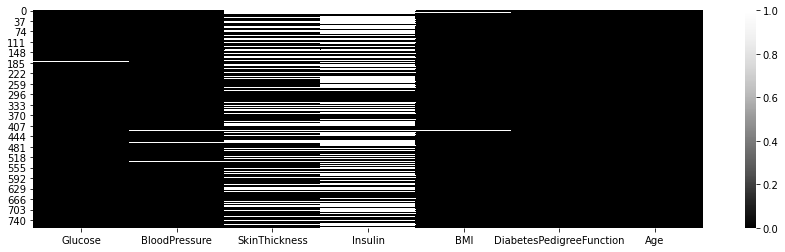

In [19]:
# 히트맵 그리기. True=1, False=0
# plt.figure: 시각화 그래프의 사이즈 조절, cmap 옵션을 지정하여 색상을 grayscale로 변경 가능
plt.figure(figsize=(15,4))
sns.heatmap(df_null, cmap='Greys_r')

## 2.1.3 훈련과 예측에 사용할 정답값을 시각화로 보기

###  정답값

In [21]:
# 정답값인 outcome 의 갯수
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [22]:
# 정닶값인 outcome 의 비율 -> 34% 발병확률
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [24]:
# groupby: index에 올 값을 () 안에 넣고, 그 뒤에 있는 []에 value를 넣음, value의 평균 확인
# 임신횟수가 늘어날수록 당뇨병 발병확률 높음, 임신횟수가 14번 이상이면 발병확률 100%이나 데이터 수가 적은 영향인지 의심 필요
df.groupby(['Pregnancies'])['Outcome'].mean()

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

In [26]:
df.groupby(['Age'])['Outcome'].mean()

Age
21    0.079365
22    0.152778
23    0.184211
24    0.173913
25    0.291667
26    0.242424
27    0.250000
28    0.285714
29    0.448276
30    0.285714
31    0.541667
32    0.562500
33    0.588235
34    0.285714
35    0.500000
36    0.625000
37    0.315789
38    0.625000
39    0.250000
40    0.461538
41    0.590909
42    0.388889
43    0.846154
44    0.625000
45    0.533333
46    0.538462
47    0.666667
48    0.200000
49    0.600000
50    0.625000
51    0.625000
52    0.875000
53    0.800000
54    0.666667
55    0.250000
56    0.666667
57    0.200000
58    0.428571
59    0.666667
60    0.400000
61    0.500000
62    0.500000
63    0.000000
64    0.000000
65    0.000000
66    0.500000
67    0.333333
68    0.000000
69    0.000000
70    1.000000
72    0.000000
81    0.000000
Name: Outcome, dtype: float64

In [27]:
# 리스트 형태로 agg에 알고 싶은 값을 넣기
# 임신하는 횟수가 많으면 그 만큼 빈도수가 적다
df.groupby(['Pregnancies'])['Outcome'].agg(['mean','count'])

,mean,count
Pregnancies,,
0,0.342342,111
1,0.214815,135
2,0.184466,103
3,0.360000,75
4,0.338235,68
5,0.368421,57
6,0.320000,50
7,0.555556,45
8,0.578947,38


In [29]:
# 왼쪽에 있던 Pregnancies라는 인덱스 값을 column 값으로 사용하고 싶을 때는 reset_index()를 사용
df_po=df.groupby(['Pregnancies'])['Outcome'].agg(['mean','count']).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<AxesSubplot:>

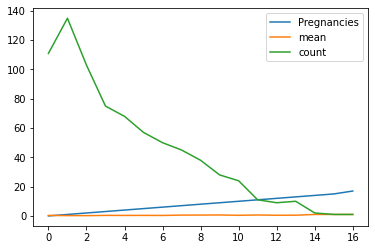

In [31]:
# 시각화 그래프
# 임신횟수에 따라 count값이 낮아짐, 그런데 수치가 다르기 때문에 의미있는 인사이트 나오기 어려움 -> 1개의 통계값만 그려보자
df_po.plot()

<AxesSubplot:>

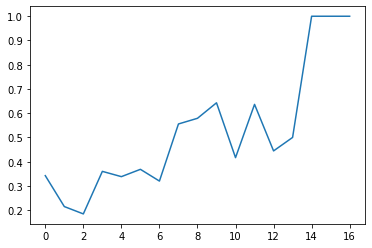

In [32]:
df_po['mean'].plot()

<AxesSubplot:>

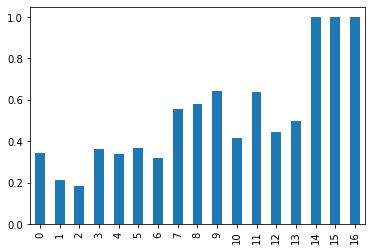

In [43]:
# 막대그래프
df_po["mean"].plot.bar()

<AxesSubplot:>

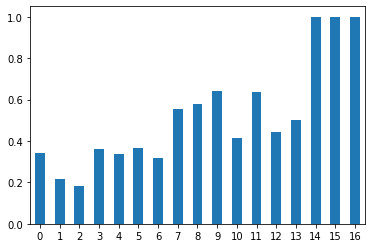

In [42]:
# 글씨 회전하여 세워서 보기
df_po["mean"].plot.bar(rot=0)

### countplot
countplot: 카테고리형 데이터를 시각화 시 사용

<AxesSubplot:xlabel='Outcome', ylabel='count'>

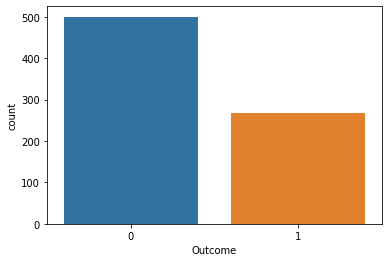

In [38]:
# 0,1 개수 세서 막대그래프
sns.countplot(data=df, x='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

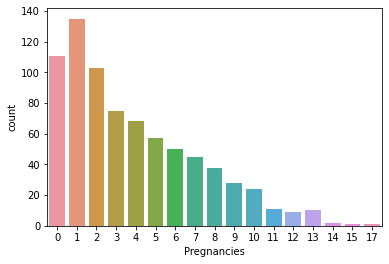

In [39]:
# 임신횟수 카운트 시각화
sns.countplot(data=df, x="Pregnancies")

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

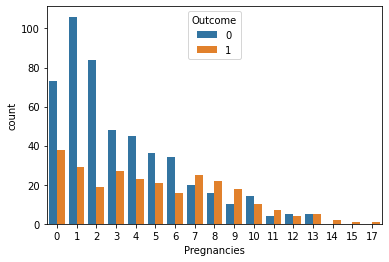

In [44]:
# 임신횟수에 따른 당뇨병 발병 빈도수 비교
# 조건의 숫자 범위 많을수록 가지 너무 많이 갈라지고 오버피팅 가능성
# 따라서 범주로 묶어주기 -> 2개 범주 (0과 1)
sns.countplot(data=df, x="Pregnancies", hue="Outcome")

In [49]:
# 5번 이상 임신 True, 6번 이하 임신 False 지정
df['Pregnancies_high']=df['Pregnancies']>6
df[['Pregnancies','Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<AxesSubplot:xlabel='Pregnancies_high', ylabel='count'>

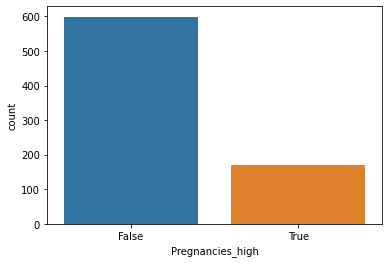

In [50]:
# 2개의 범주(카테고리)로 나뉜 임신횟수 카운트
# 임신횟수 적은 사람의 수가 더 많음
sns.countplot(data=df, x="Pregnancies_high")

<AxesSubplot:xlabel='Pregnancies_high', ylabel='count'>

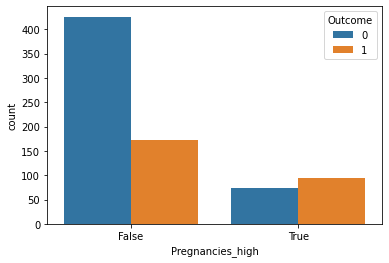

In [54]:
# 임신횟수 적은 그룹(False): 발병X > 발병O
# 임신횟수 높은 그룹(True): 발병X < 발병O
sns.countplot(data=df, x="Pregnancies_high", hue='Outcome')

## 2.1.4 두 개의 변수를 정답값에 따라 시각화 해보기

### barplot

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

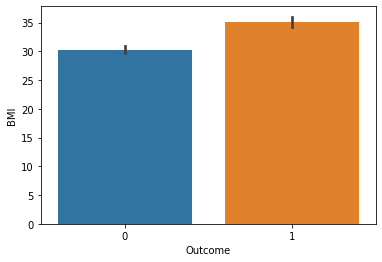

In [52]:
# 당뇨병 발병에 따른 BMI 수치 비교
sns.barplot(data=df, x='Outcome', y='BMI')

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

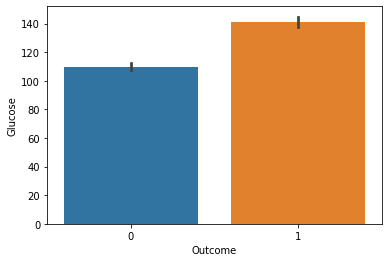

In [55]:
# 당뇨병 발병에 따른 포도당(글루코스) 수치 비교
sns.barplot(data=df, x='Outcome', y='Glucose')

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

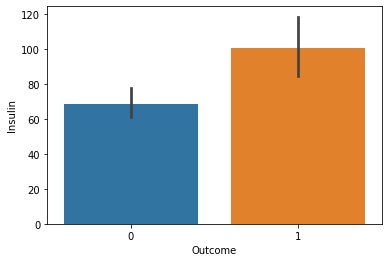

In [56]:
# 당뇨병 발병에 따른 인슐린 수치 비교
# y축은 평균값
# 그래프 위 세로의 까만 선은 데이터 일부를 샘플링한 95%의 신뢰구간, 신뢰구간의 차이가 큼
sns.barplot(data=df, x='Outcome', y='Insulin')

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

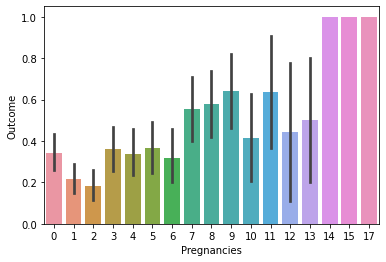

In [57]:
# 평균값 출력, Outcome 비율 그래프
sns.barplot(data=df, x='Pregnancies', y='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>

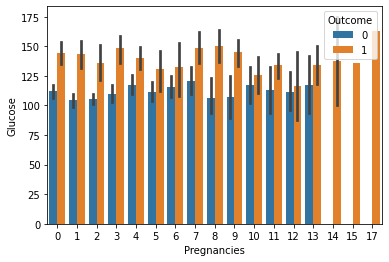

In [58]:
# 당뇨병 발병여부에 따라 글루코스 수치 차이 있음(글루코스 수치 더 높음)
sns.barplot(data=df, x="Pregnancies", y='Glucose', hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='BMI'>

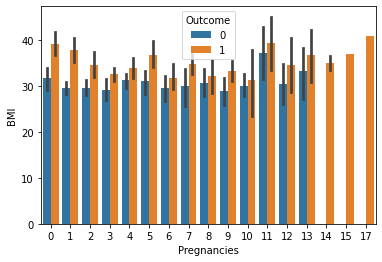

In [59]:
# 당뇨병 발병한 사람들의 BMI(체질량지수) 수치가 더 높음 
sns.barplot(data=df, x="Pregnancies", y='BMI', hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

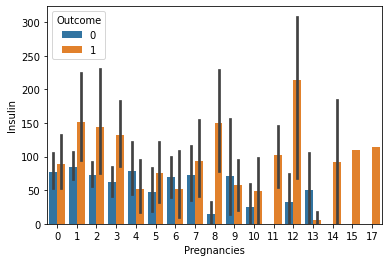

In [61]:
# 대체로 당뇨병 발병한 사람들의 인슐린 수치가 더 높음
# 평균값 y축, 신뢰구간의 차이가 큼
sns.barplot(data=df, x="Pregnancies", y='Insulin', hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

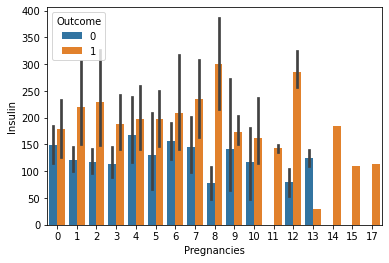

In [62]:
# 인슐린 수치에 결측치 많기 때문에 0보다 큰 값만 이용
# 신뢰구간 크기 줄어듬
# 발병하는 사람들의 인슐린 신뢰구간의 차이가 큼
# 발병하지 않는 사람들의 인슐린 수치 낮음
sns.barplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome')

### boxplot

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

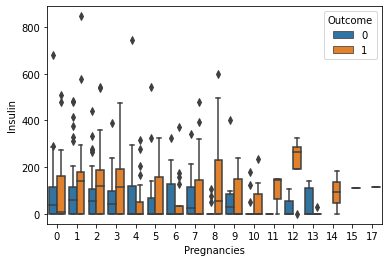

In [63]:
# 1사분위수와 3사분위수 차이 큼, 최대값과 최소값 차이 큼
# 인슐린 값에 0이 많아 boxplot이 주저앉음
sns.boxplot(data=df, x='Pregnancies', y='Insulin', hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

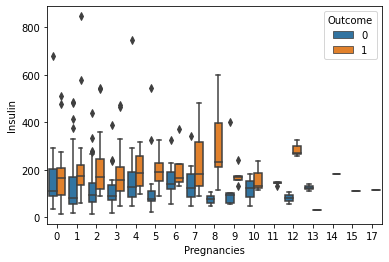

In [64]:
# 임신횟수 증가할수록 수치 상승
sns.boxplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome')

### violinplot
boxplot 단점 보완

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

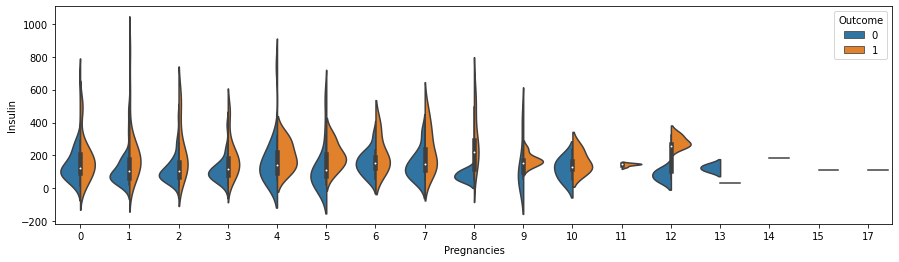

In [65]:
# 바이올린이 얇으므로 굵게 그리고, 두 파트를 좌우로 데이터를 나눠보기 위해 split 옵션 지정
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome', split=True)

### swarmplot
산포(점)도 그리는 데 적합, split은 violinplot에서만 사용 가능<br>
violinplot과 swarmplot은 데이터 수 확인 가능

c:\deep\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\deep\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

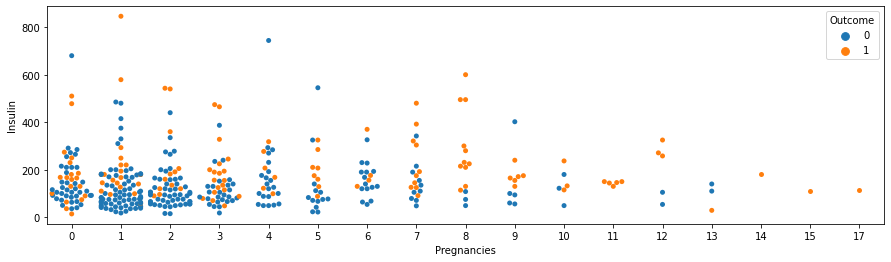

In [66]:
# 주황색(1): 발병O, 파란색(0): 발병X
# 임신횟수는 당뇨병 발병률과 관련 있는 것으로 보임
plt.figure(figsize=(15,4))
sns.swarmplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome')

## 2.1.5 수치형 변수의 분포를 정답값에 따라 시각화 해보기

### distplot
distplot: 1개의 수치형 변수 표현 시 사용하는 시각화 그래프<br>
distplot은 다른 그래프와 달리 data 옵션 없이 바로 Series 데이터를 넣어줌, 밀도함수와 커널추정함수를 같이 그려줌<br>
countplot: 카테고리형 데이터를 시각화 시 사용


c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

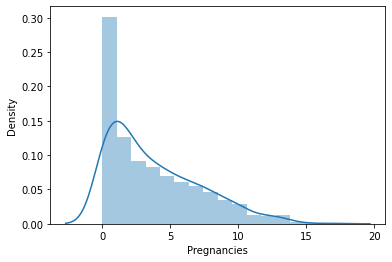

In [67]:
sns.distplot(df['Pregnancies'])

In [68]:
# 발병한 케이스, 발병하지 않은 케이스를 각 변수에 넣기
df_0=df[df['Outcome']==0]
df_1=df[df['Outcome']==1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

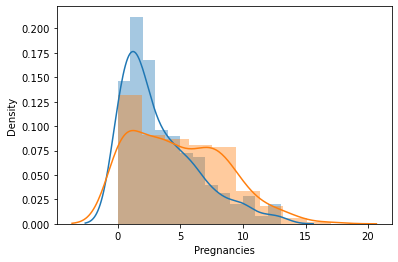

In [69]:
# 임신여부 5가 넘어가면 발병률 더 높아짐(df_0 < df_1)
sns.distplot(df_0['Pregnancies'])
sns.distplot(df_1['Pregnancies'])

c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

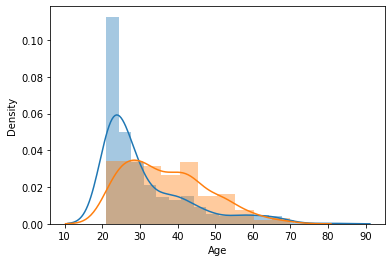

In [70]:
# 나이에 따른 당뇨병 발병 여부 시각화
# 30세 이후 발병 케이스 더 많음
sns.distplot(df_0["Age"])
sns.distplot(df_1["Age"])

c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

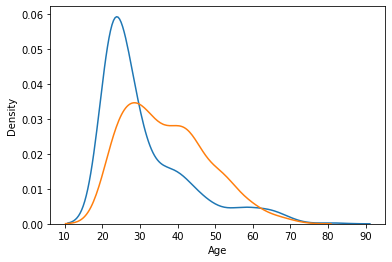

In [71]:
# hist=False 는 부드러운 곡선만 그림
sns.distplot(df_0["Age"], hist=False)
sns.distplot(df_1['Age'], hist=False)

c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\deep\python37\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\deep\python37\lib\site-packages\seaborn\distributions.py:20

<AxesSubplot:xlabel='Age', ylabel='Density'>

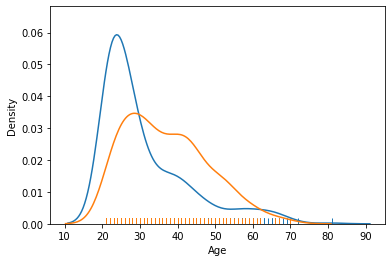

In [72]:
# rug: 실수 분포 플롯, 그래프의 x축에 데이터를 1차원으로 표시, 실제 데이터의 위치 보여줌
sns.distplot(df_0['Age'], hist=False, rug=True)
sns.distplot(df_1['Age'], hist=False, rug=True)

c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

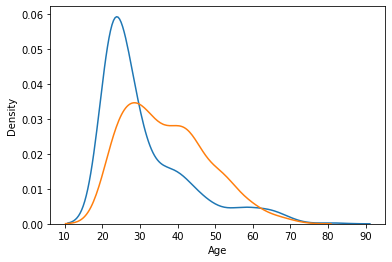

In [73]:
# kde: 커널 밀도(kernel density) 분포, 커널이라는 함수를 겹치는 방법, 히스토그램보다 부드러운 분포 곡선으로 시각화
sns.distplot(df_0['Age'], hist=False, kde=True)
sns.distplot(df_1['Age'], hist=False, kde=True)

## 2.1.6 서브플롯으로 모든 변수 한번에 시각화 하기
다양한 변수의 상관관계를 subplot 그래프로 시각화

### subplot
subplot: 범주형 column을 시각화할때 사용<br>
distplot: 밀도함수와 커널추정함수를 같이 그려줌

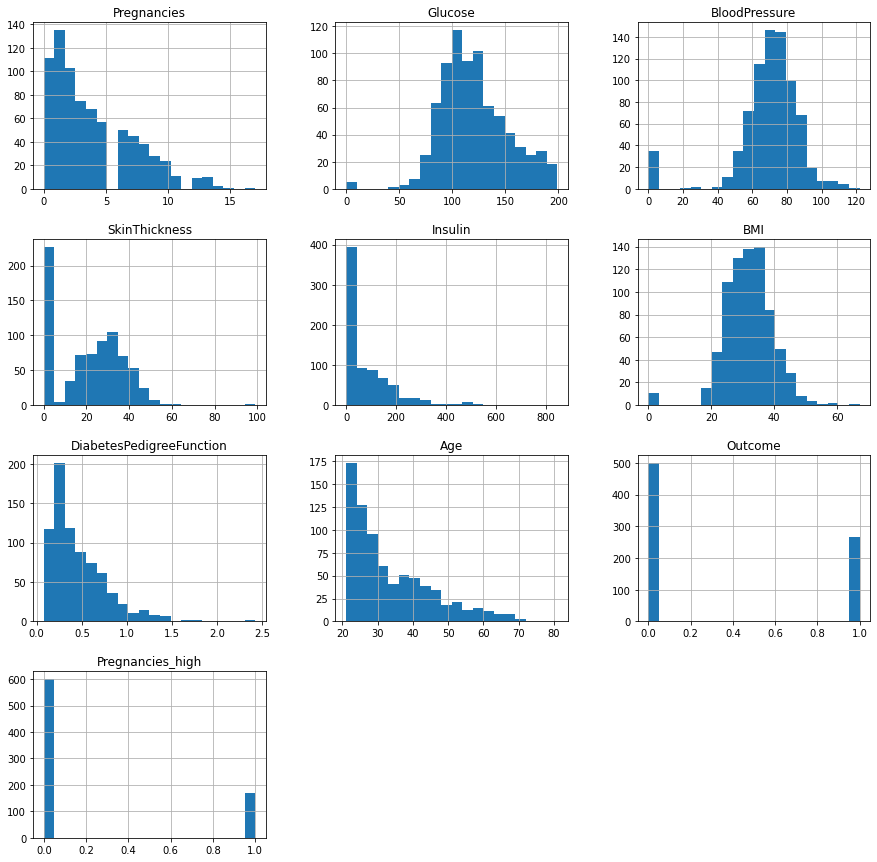

In [75]:
# histplot을 그릴 때는 수치형 데이터만 가능 -> boolean 값을 int형으로 바꿔야함
# figsize로 사이즈를 변경, bins로 막대의 갯수도 늘림
df['Pregnancies_high']=df['Pregnancies_high'].astype(int)
h=df.hist(figsize=(15,15), bins=20)

In [76]:
# 모든 column 다 만들고 싶으면 반복문 통해 서브플롯 그려야 함, column 개수 세기
col_num=df.columns.shape
col_num

(10,)

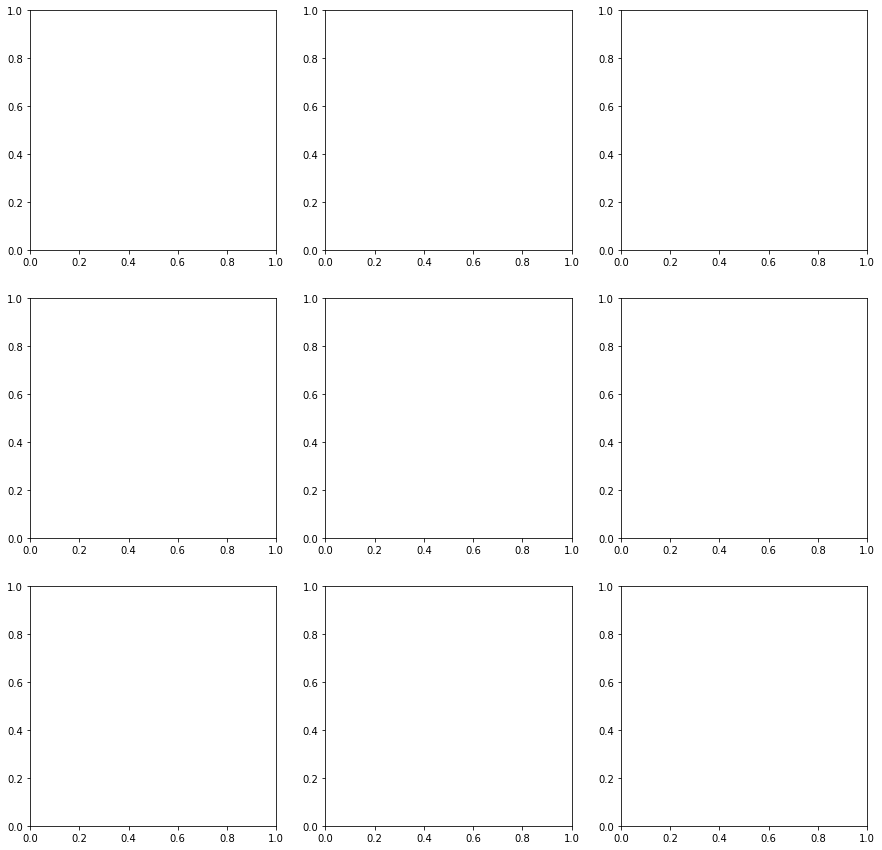

In [77]:
# plt.subplots만 하면 빈 그래프만 나옴, 이 데이터들을 먼저 fig, axes에 넣기
fig, axes=plt.subplots(nrows=3, ncols=3, figsize=(15,15))

c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Outcome', ylabel='Density'>

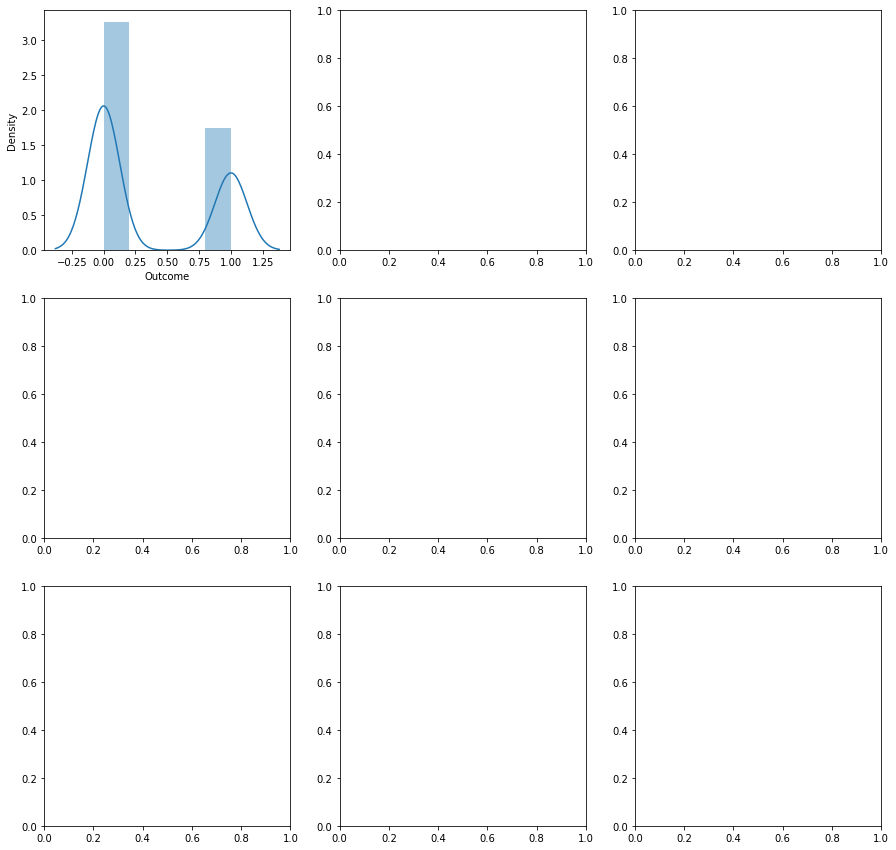

In [78]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
# Outcome을 x축으로 하는 distplot 그리기, ax 옵션에 인덱싱하여 원하는 위치 지정
sns.distplot(df['Outcome'], ax=axes[0][0]) # 첫번째

### 반복문 활용하여 subplots 그리기

0
1
2
3
4
5
6
7
8


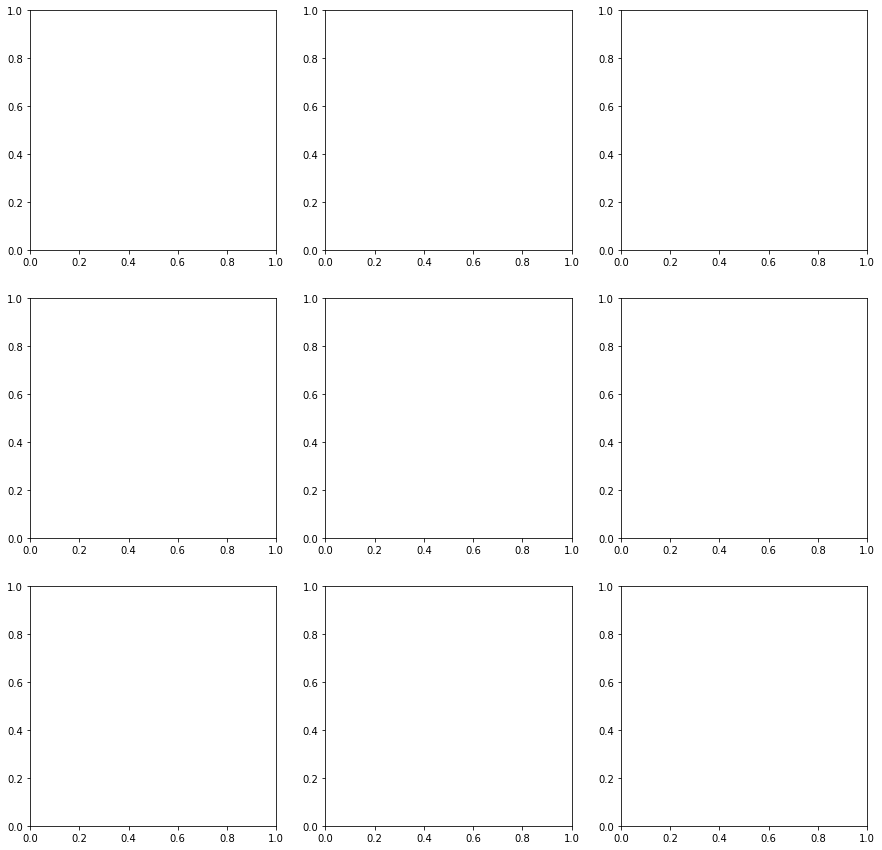

In [79]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for i in range(9):
    print(i)

In [80]:
# cols에 그래프를 그리고자 하는 데이터 넣기
cols=df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

0 Pregnancies 0 0
1 Glucose 0 1
2 BloodPressure 0 2
3 SkinThickness 1 0
4 Insulin 1 1


c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histogra

5 BMI 1 2
6 DiabetesPedigreeFunction 2 0
7 Age 2 1
8 Outcome 2 2


c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histogra

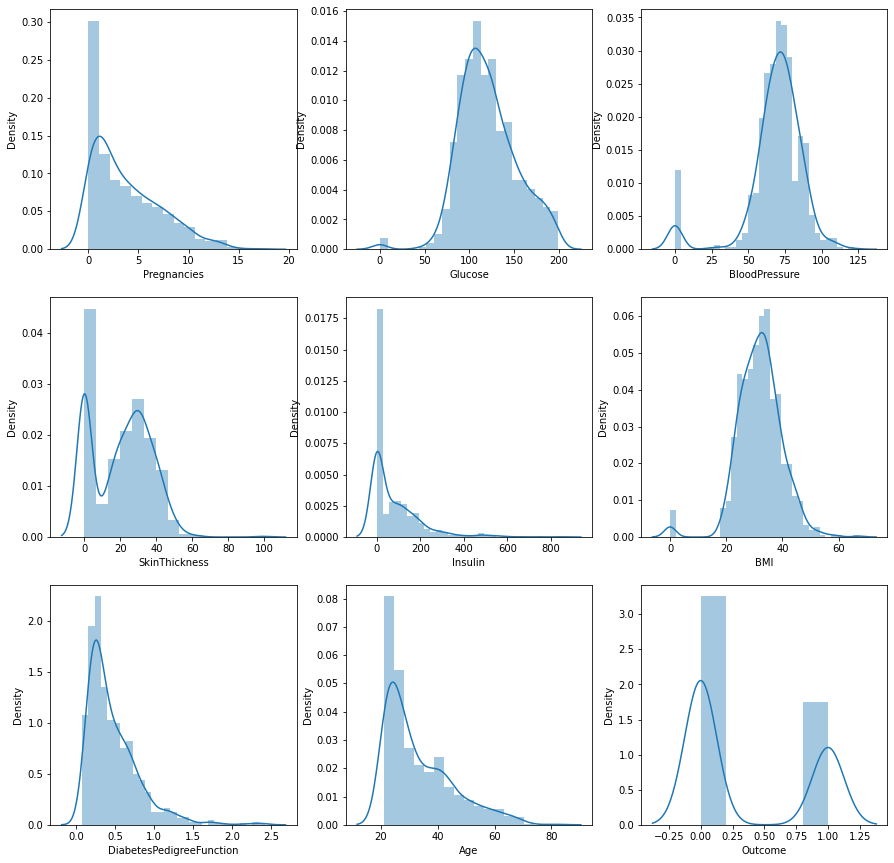

In [84]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# 히스토그램은 빈도수를 y축 값으로 표현
# distplot은 값을 적분할 때 1이 된 값을 y축에 나타내고, 부드러운 밀도함수로 계산해서 그려줌
for i, col_name in enumerate(cols):
    row=i//3 #나누기 한 나머지 제거
    col=i%3
    print(i, col_name, row, col)
    sns.distplot(df[col_name], ax=axes[row][col])

c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histogra

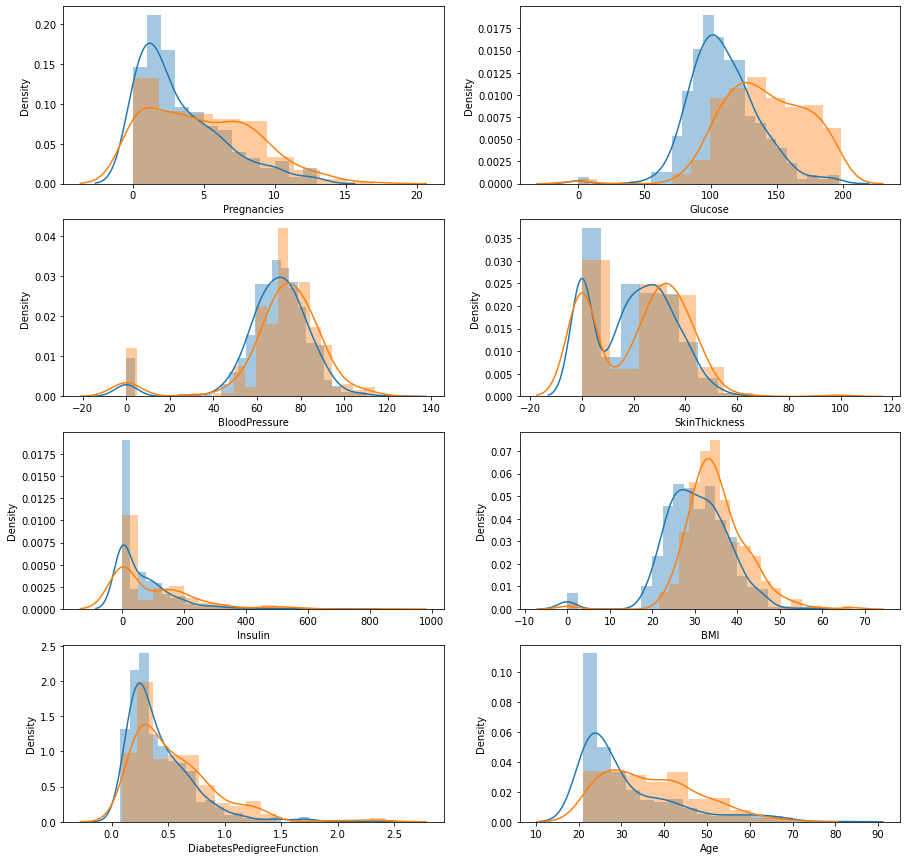

In [82]:
# nrows와 ncols 옵션을 지정하여 4행 2열로 만들기 (Pregnancies~Age: 8개)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# 특정 수치에 따라 당뇨병 발병 여부가 나뉨
# 글루코스, BMI 높은 사람들이 발병률이 높음, 혈압은 당뇨병 발병률과 크게 차이 없음
# 이처럼 연속된 수치 변수를 범주형 변수로 만들어 표현 가능
for i, col_name in enumerate(cols[:-1]): # Outcome 빼고
    row=i//2
    col=i%2
    sns.distplot(df_0[col_name], ax=axes[row][col])
    sns.distplot(df_1[col_name], ax=axes[row][col])

## 2.1.7 시각화를 통한 변수간의 차이 이해하기

### violinplot
violinplot으로 subplot 그리기

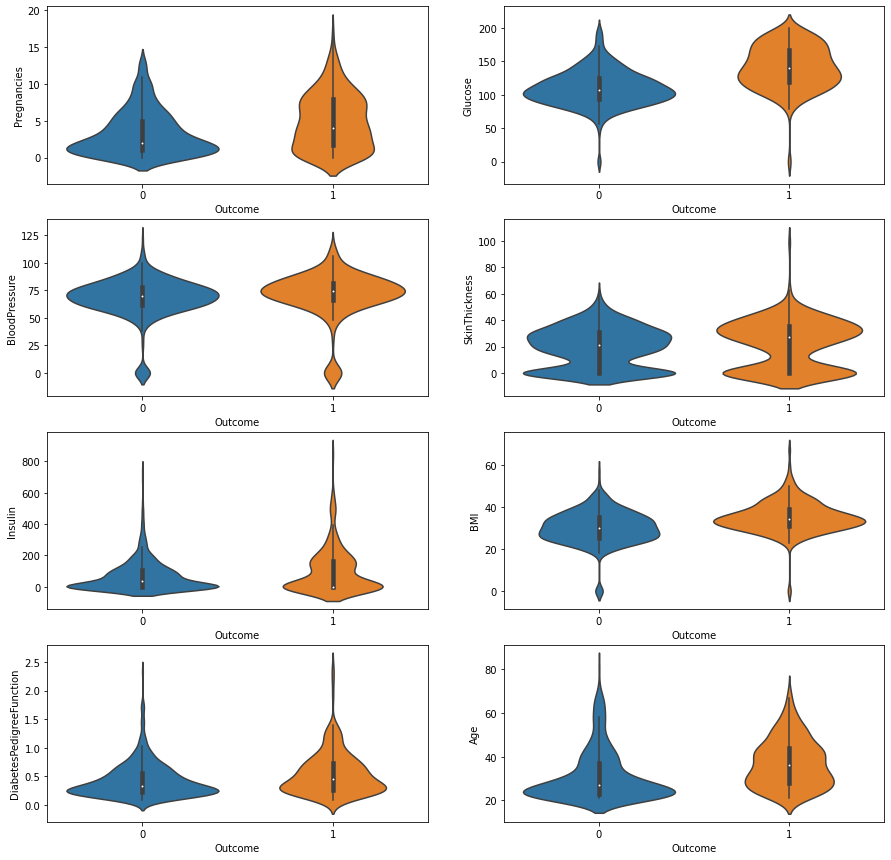

In [86]:
# 이전의 displot 소스에서 violinplot으로 변경, data, x, y 지정
# 0으로 몰린 데이터는 결측치
# 포도당 수치와 인슐린 수치가 당뇨병과 관련 있을 것이란 가설 제시
fig, axes=plt.subplots(nrows=4, ncols=2,figsize=(15,15))

for i, col_name in enumerate(cols[:-1]):
    row=i//2
    col=i%2
    sns.violinplot(data=df, x='Outcome', y=col_name, ax=axes[row][col])
 

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

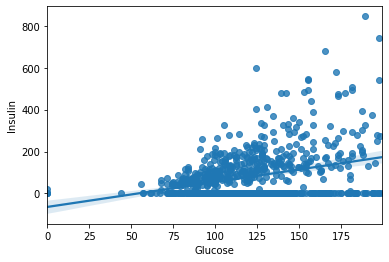

In [87]:
# regplot: hue 옵션 없음, 회귀선만 그리고 색상 다르게 지정X
sns.regplot(data=df, x="Glucose",y="Insulin")

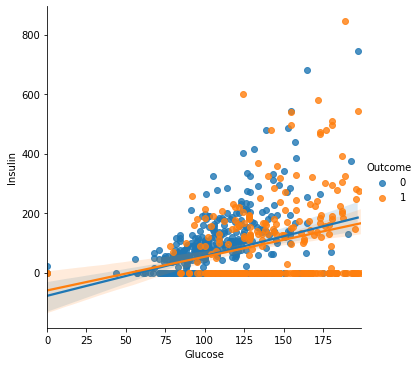

In [91]:
# regplot - 색상 변경, hue 옵션 설정 -> lmplot
sns.lmplot(data=df, x="Glucose", y="Insulin", hue="Outcome")

### pairplot
pairplot: 모든 수치에 대한 plot 그림, 시간 오래 걸림

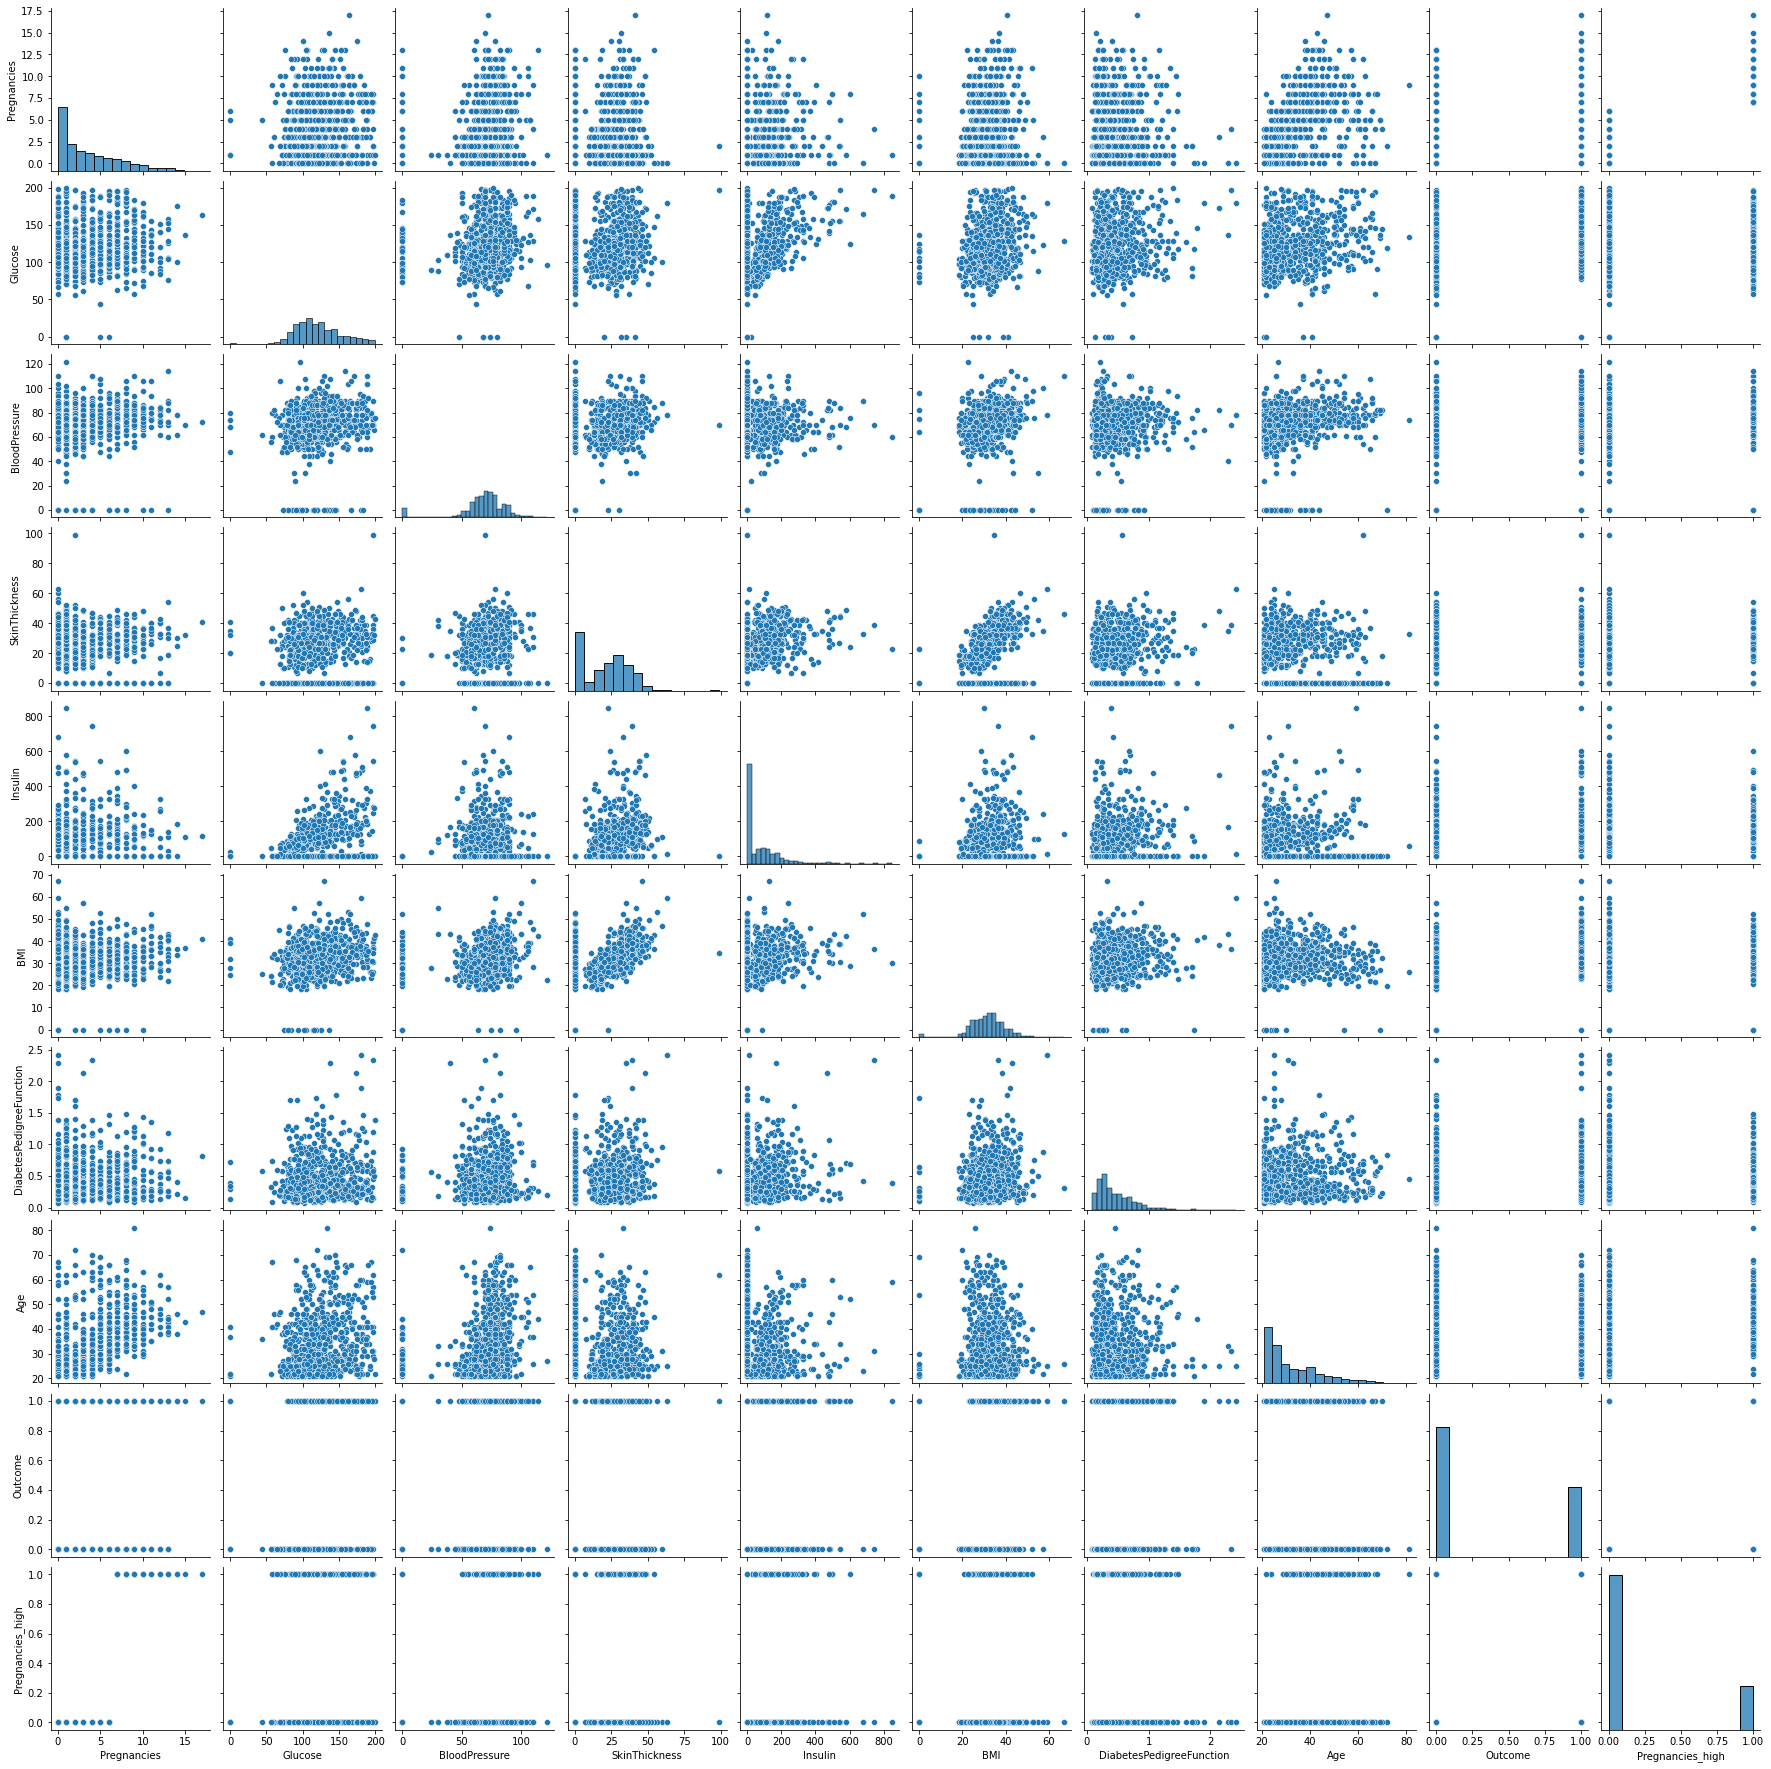

In [89]:
sns.pairplot(df)

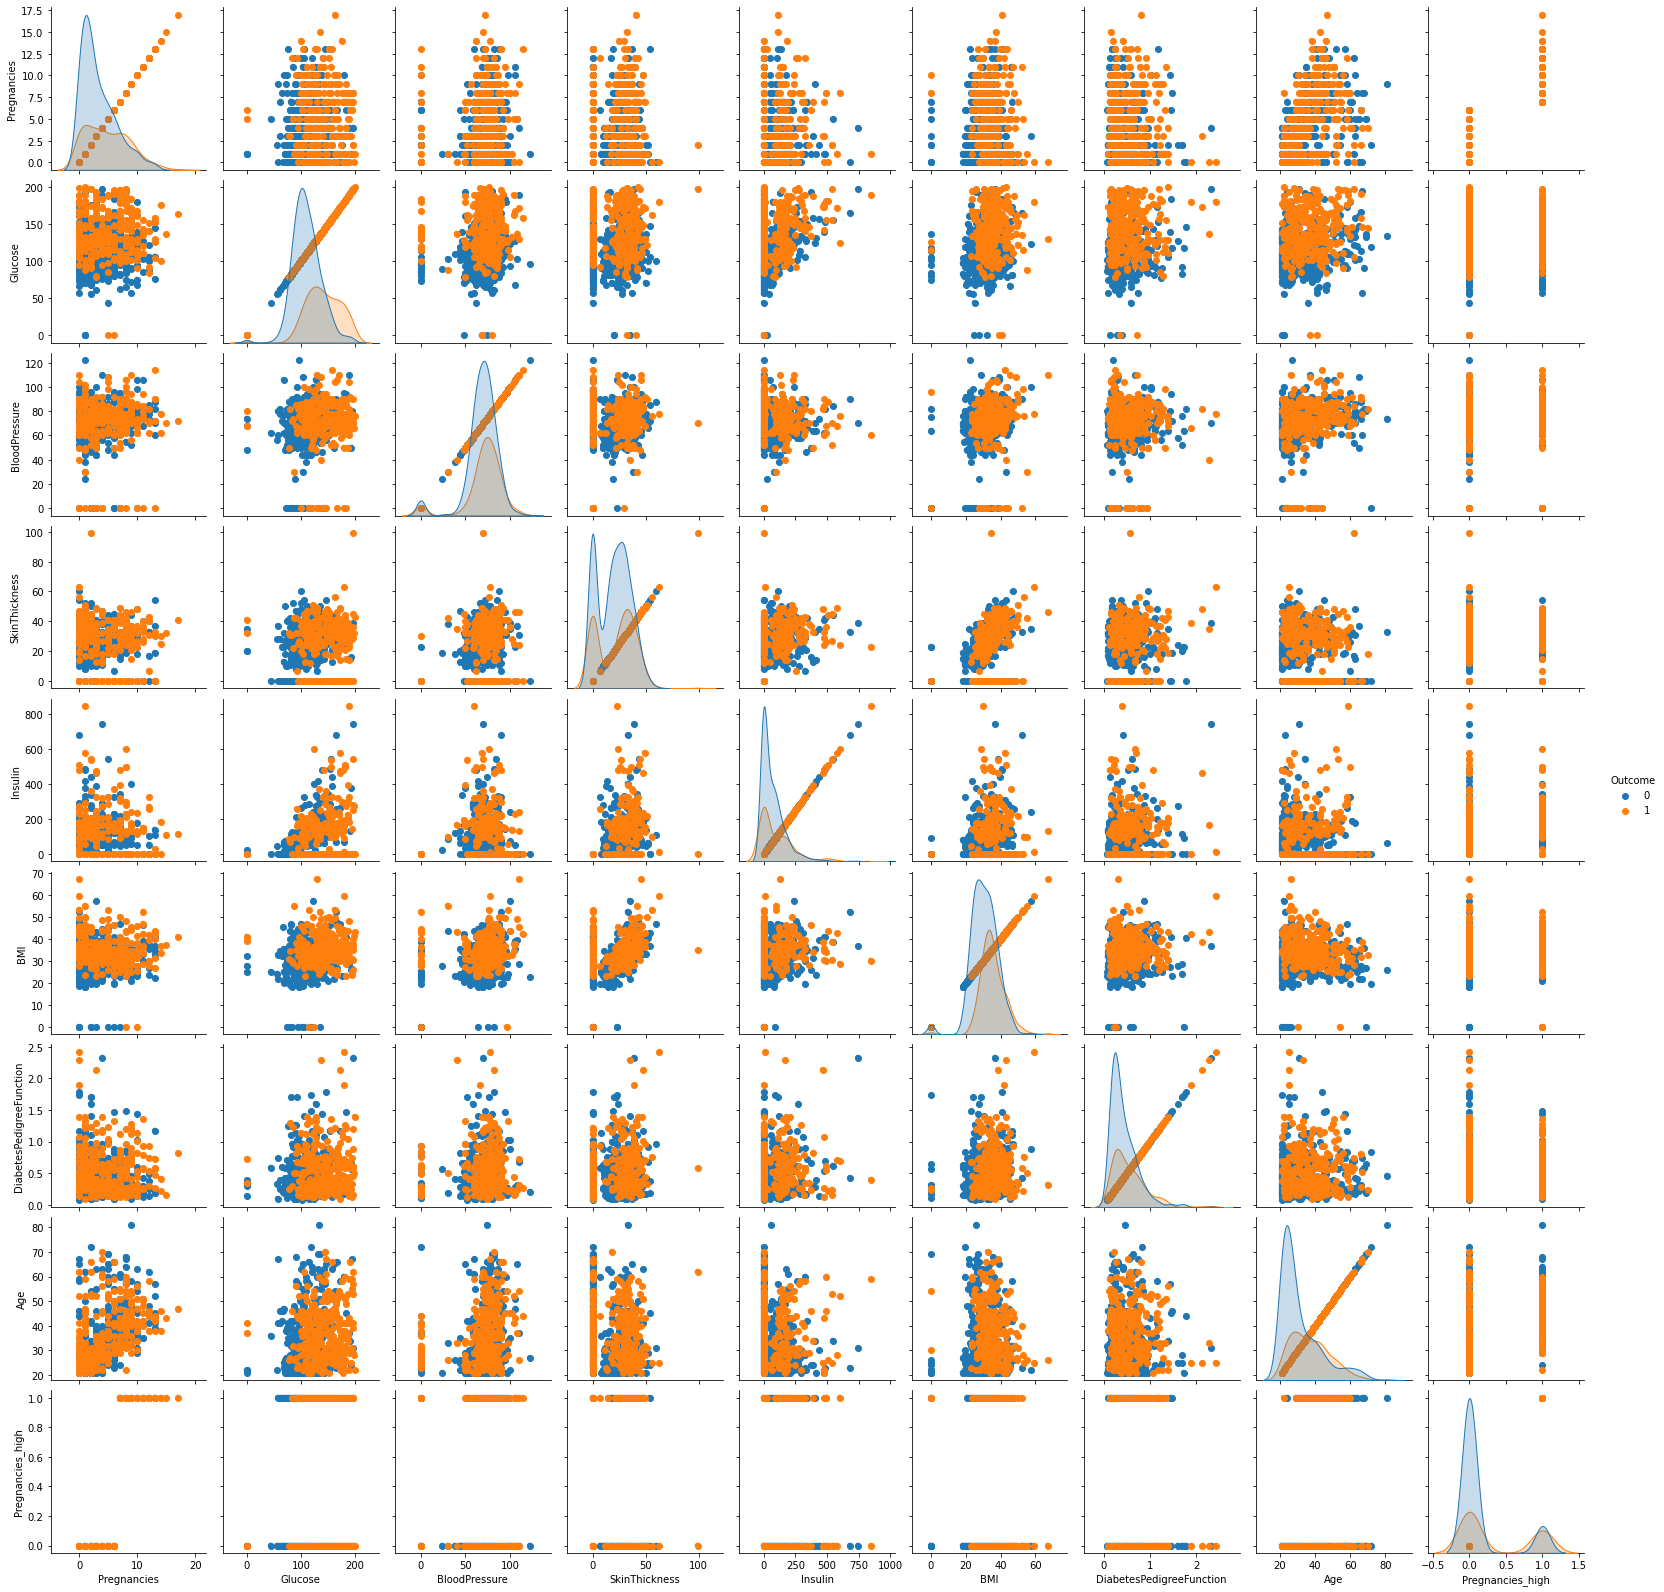

In [92]:
# 대각선의 그래프들은 자기자신이므로 강한 상관관계 확인 
g=sns.pairplot(df, hue="Outcome")
g.map(plt.scatter)

### 2.1.8 피처엔지니어링을 위한 상관 계수 분석하기
상관분석: 두 변수 간 선형적/비선형적 관계 여부 분석하는 방법
<br>수치가 1에 가까울수록 강한 양의 상관관계, -1에 가까울수록 강한 음의 상관관계, 0이면 상관관계X

In [94]:
# 상관계수 계산, 대각선은 자기자신이므로 1, 수치에 따라 다른 색상 확인(진할수록 강한 상관관계)
# ppandas 에서 상관계수 구하는 함수: corr()
df_corr=df.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.821533
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.151271
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.122218
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.030295
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.031523
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.039075
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.016022
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.468883
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.237557
Pregnancies_high,0.821533,0.151271,0.122218,-0.030295,-0.031523,0.039075,0.016022,0.468883,0.237557,1.000000


<AxesSubplot:>

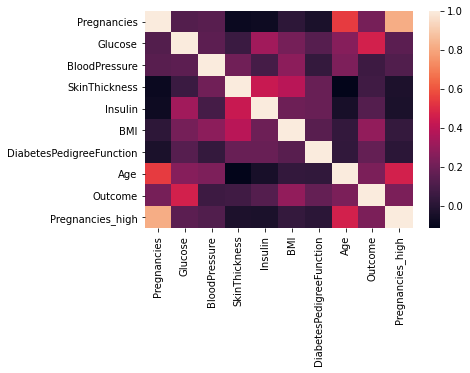

In [96]:
# 히트맵, 1일때 가장 밝음
sns.heatmap(df_corr)

<AxesSubplot:>

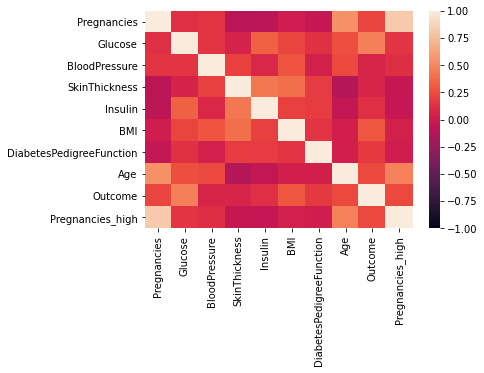

In [97]:
# 음의 상관관계 잘 보이게 하기 위해 vmax, vmin 옵션으로 최대, 최소값 지정
sns.heatmap(df_corr, vmax=1, vmin=-1)

<AxesSubplot:>

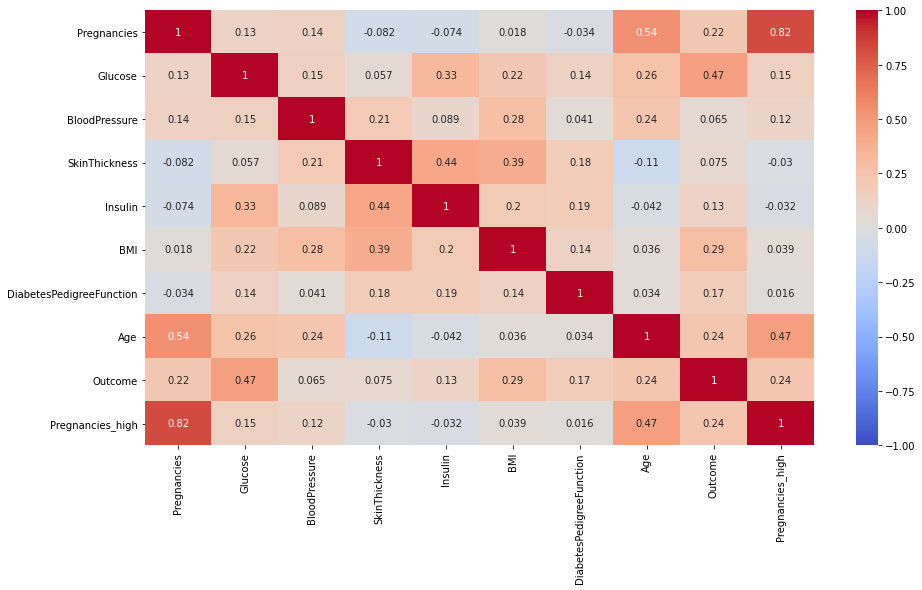

In [103]:
# figure 로 사이즈 조절, annot 옵션으로 수치 지정
# 글루코스와 outcome 값이 상관관계 높음, 인슐린과 outcome 상관관계 낮음
plt.figure(figsize=(15,8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap='coolwarm')

In [111]:
df.iloc[:,:]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,0
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1
764,2,122,70,27,0,36.8,0.340,27,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0
766,1,126,60,0,0,30.1,0.349,47,1,0


In [105]:
# outcome, pregnancies_high 제외하고 age까지만 가져오도록 -2로 지정
# 0은 null 값으로 만듦
df.iloc[:,:-2].replace(0, np.nan)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47


In [112]:
# Outcome 값을 다시 데이터셋에 넣음
df_matrix=df.iloc[:,:-2].replace(0, np.nan)
df_matrix['Outcome']=df['Outcome']
df_matrix.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [113]:
df_corr=df_matrix.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


<AxesSubplot:>

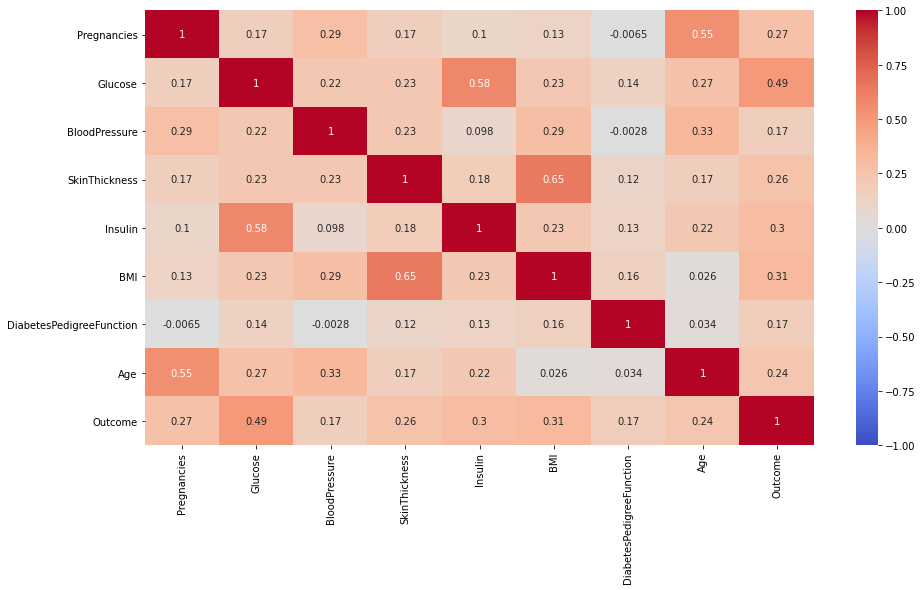

In [115]:
# 결측치 처리 후 인슐린과 글루코스 상관관계 꽤 높은 것 확인
# Outcome 과 인슐린도 높은 상관관계, 음의 상관관계 보이는 변수들 있지만 큰 의미X
plt.figure(figsize=(15, 8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap='coolwarm')

In [116]:
# Outcome 수치에 대한 상관계수만 모아서 봄
df_corr["Outcome"]

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

<AxesSubplot:xlabel='Insulin', ylabel='Glucose'>

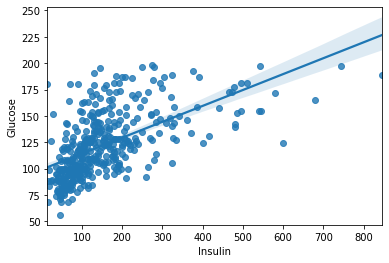

In [117]:
# 회귀선이 1에 가까울수록 상관계수 높음
# Insulin 이상치 정리하면 더욱 상관관계 높아질 것
# df_matrix 는 결측치 처리된 데이터(0 -> nan)
sns.regplot(data=df_matrix, x='Insulin', y='Glucose')

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

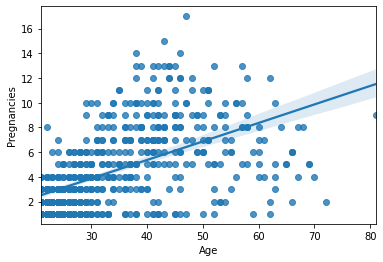

In [119]:
# 연령과 임신횟수의 양의 상관관계
sns.regplot(data=df_matrix, x='Age', y='Pregnancies')

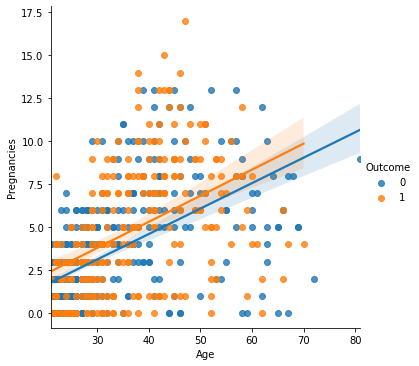

In [121]:
# 회귀선이 다르게 그려지긴 했지만 큰 차이 없음
# hue 통해 데이터에 따라 다른 색상으로 그릴 수 있음(lmplot)
sns.lmplot(data=df, x='Age', y='Pregnancies', hue='Outcome')

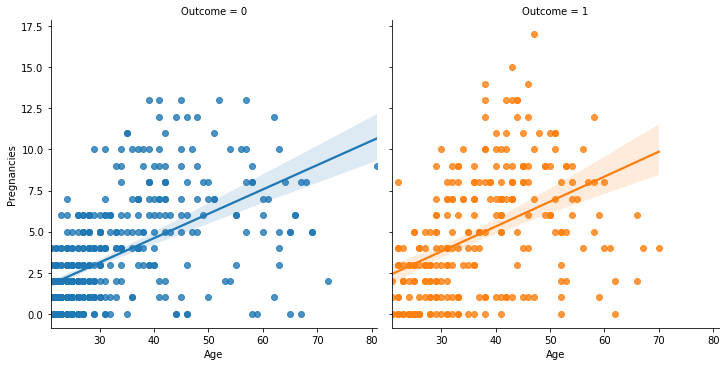

In [122]:
# Outcome에따라 열을 2개로 늘려서 그리기
sns.lmplot(data=df, x='Age', y='Pregnancies', hue='Outcome', col='Outcome')